In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cars_sample.csv')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,17/03/2016 15:47,Ford_Focus_Turnier_1.6_TDCi_DPF_Connection,private,offer,3200,test,station wagon,2006,manual,109,focus,150000,7,diesel,ford,no,17/03/2016 0:00,44534,17/03/2016 15:47
1,03/04/2016 21:47,Mazda_6_SKYACTIV_D_175_2_2_Sports_Line_5Jahre_...,private,offer,30900,test,limousine,2015,automatic,175,6_reihe,20000,6,diesel,mazda,no,03/04/2016 0:00,63808,05/04/2016 22:47
2,23/03/2016 1:57,Opel_Vectra_B_1.6._101_PS_._Nur_91_tkm_._Gepfl...,private,offer,1600,test,limousine,1998,manual,101,NaN,100000,8,petrol,opel,no,23/03/2016 0:00,24983,07/04/2016 4:46
3,24/03/2016 13:39,Volkswagen_Polo_60_Servo,private,offer,999,control,small car,1996,automatic,60,polo,125000,12,petrol,volkswagen,no,24/03/2016 0:00,32049,07/04/2016 4:45
4,09/03/2016 23:44,A_Klasse_nicht_fahrbereit,private,offer,400,test,small car,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,yes,09/03/2016 0:00,72762,14/03/2016 5:44


In [3]:
df['offerType'].value_counts()

offer      49997
request        3
Name: offerType, dtype: int64

In [4]:
df.fillna(value='NA', inplace=True)

In [5]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % df.loc[df.price < 100].count()['name'])
print("Too expensive: %d"  % df.loc[df.price > 150000].count()['name'])
print("Too few km: %d"  % df.loc[df.kilometer <= 5000].count()['name'])
print("Too many km: %d"  % df.loc[df.kilometer >= 150000].count()['name'])
print("Too few powerPS: %d"  % df.loc[df.powerPS < 10].count()['name'])
print("Too many powerPS: %d"  % df.loc[df.powerPS > 500].count()['name'])

Too new: 1974
Too old: 37
Too cheap: 1794
Too expensive: 40
Too few km: 970
Too many km: 32399
Too few powerPS: 5506
Too many powerPS: 120


In [6]:
df.drop(['name','seller', 'offerType', 'dateCrawled', 'lastSeen', 'postalCode', 'dateCreated'], 
        axis='columns', inplace=True)

In [7]:
df = df[
        (df.yearOfRegistration <= 2019) 
      & (df.yearOfRegistration >= 1960) 
      & (df.price >= 100) 
      & (df.price <= 500000) 
      & (df.powerPS >= 10) 
      & (df.powerPS <= 500)]

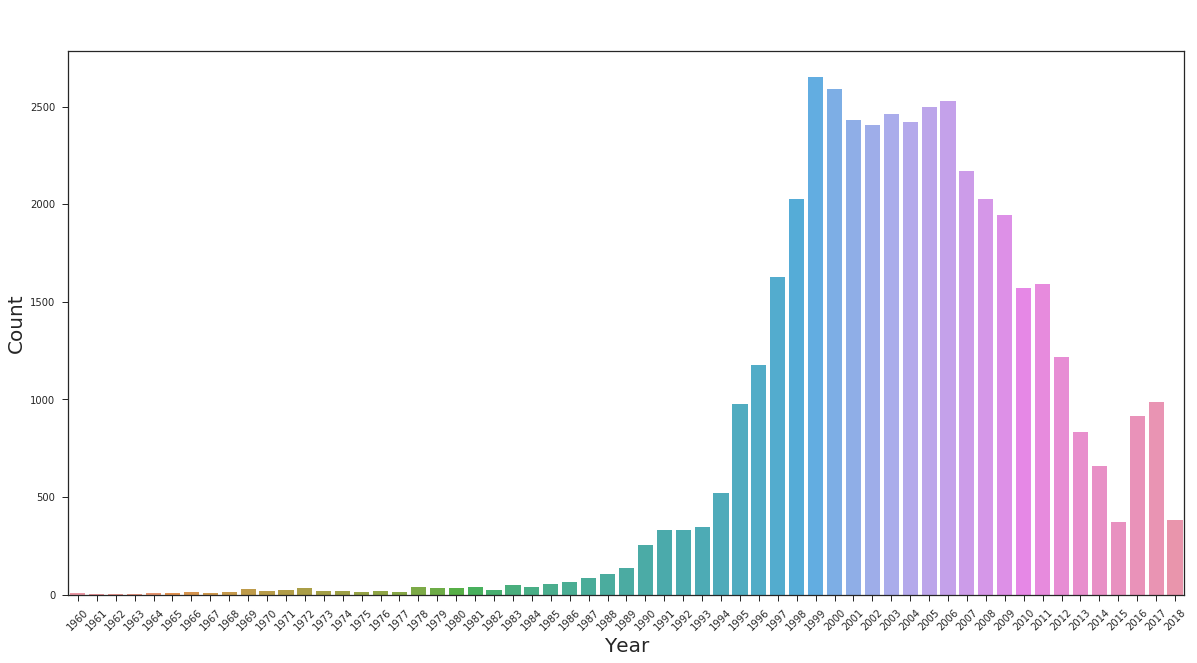

In [8]:
X1=df['yearOfRegistration'].value_counts()
plt.figure(figsize=(20,10))
plot=sns.barplot(x=X1.index,y=X1.values)
plot.set_xlabel("Year",fontsize=20)
plot.set_ylabel("Count",fontsize=20)
plot.axes.set_title(" ",fontsize=50)
for item in plot.get_xticklabels():
    item.set_rotation(45)

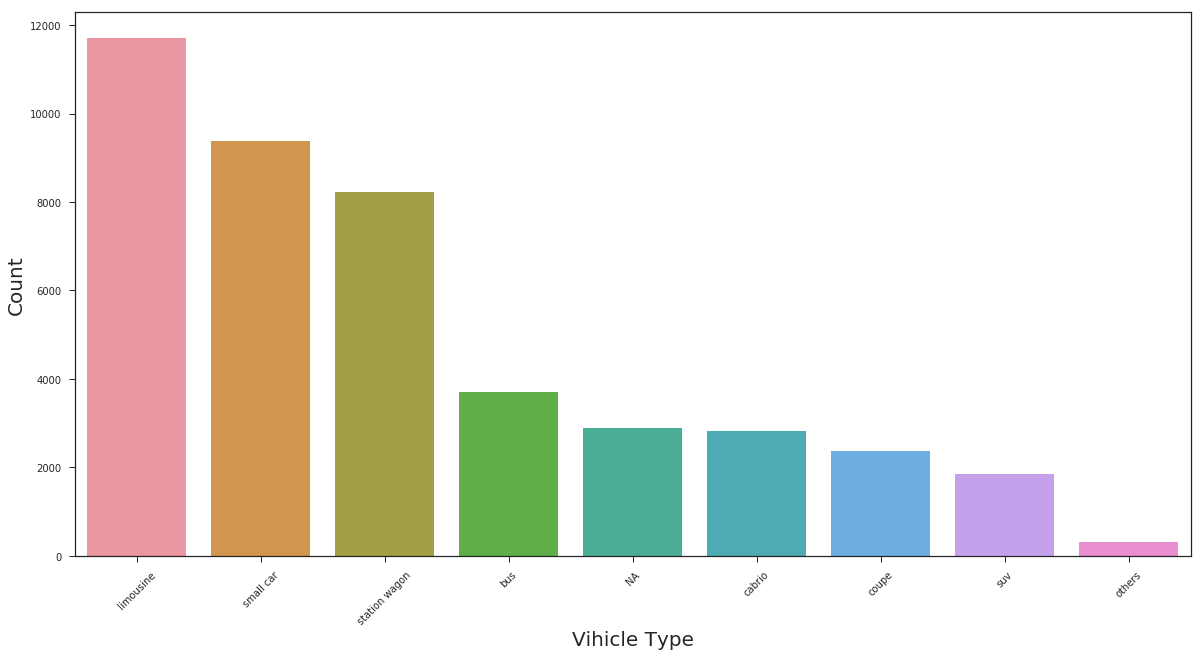

In [9]:
X3=df['vehicleType'].value_counts()
plt.figure(figsize=(20,10))
plot=sns.barplot(x=X3.index,y=X3.values)
plot.set_xlabel("Vihicle Type",fontsize=20)
plot.set_ylabel("Count",fontsize=20)
for item in plot.get_xticklabels():
    item.set_rotation(45)

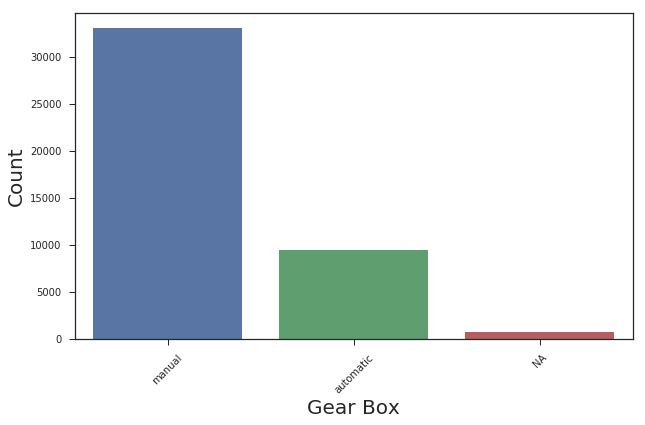

In [10]:
X2=df['gearbox'].value_counts()
plt.figure(figsize=(10,6))
plot=sns.barplot(x=X2.index,y=X2.values)
plot.set_xlabel("Gear Box",fontsize=20)
plot.set_ylabel("Count",fontsize=20)
for item in plot.get_xticklabels():
    item.set_rotation(45)

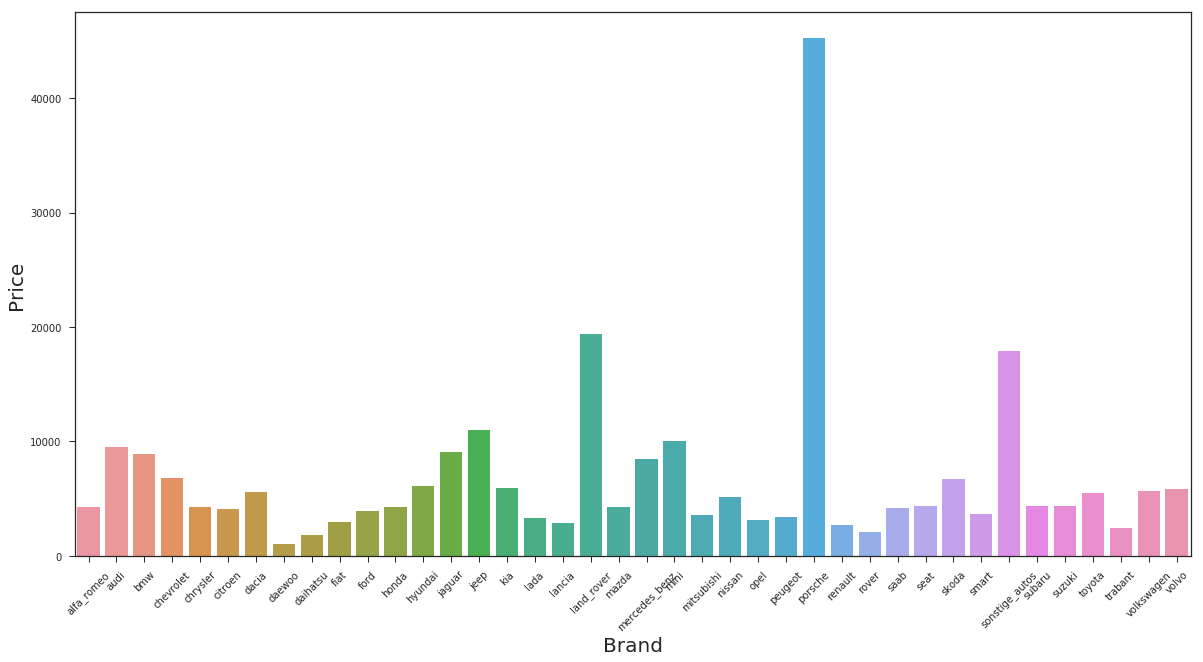

In [11]:
X4= df.groupby(['brand'])['price'].mean().reset_index()
plt.figure(figsize=(20,10))
plot=sns.barplot(x=X4['brand'],y=X4['price'])
plot.set_xlabel("Brand",fontsize=20)
plot.set_ylabel("Price",fontsize=20)
for item in plot.get_xticklabels():
    item.set_rotation(45)

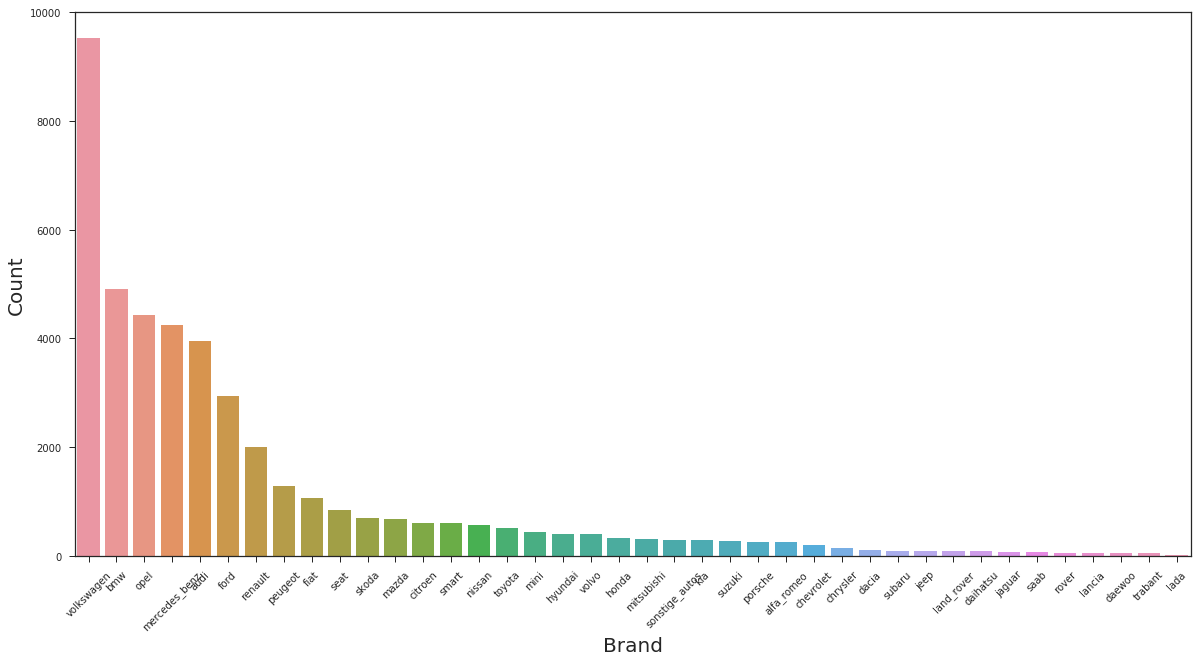

In [12]:
X6=df['brand'].value_counts()
plt.figure(figsize=(20,10))
plot=sns.barplot(x=X6.index,y=X6.values)
plot.set_xlabel("Brand",fontsize=20)
plot.set_ylabel("Count",fontsize=20)
for item in plot.get_xticklabels():
    item.set_rotation(45)

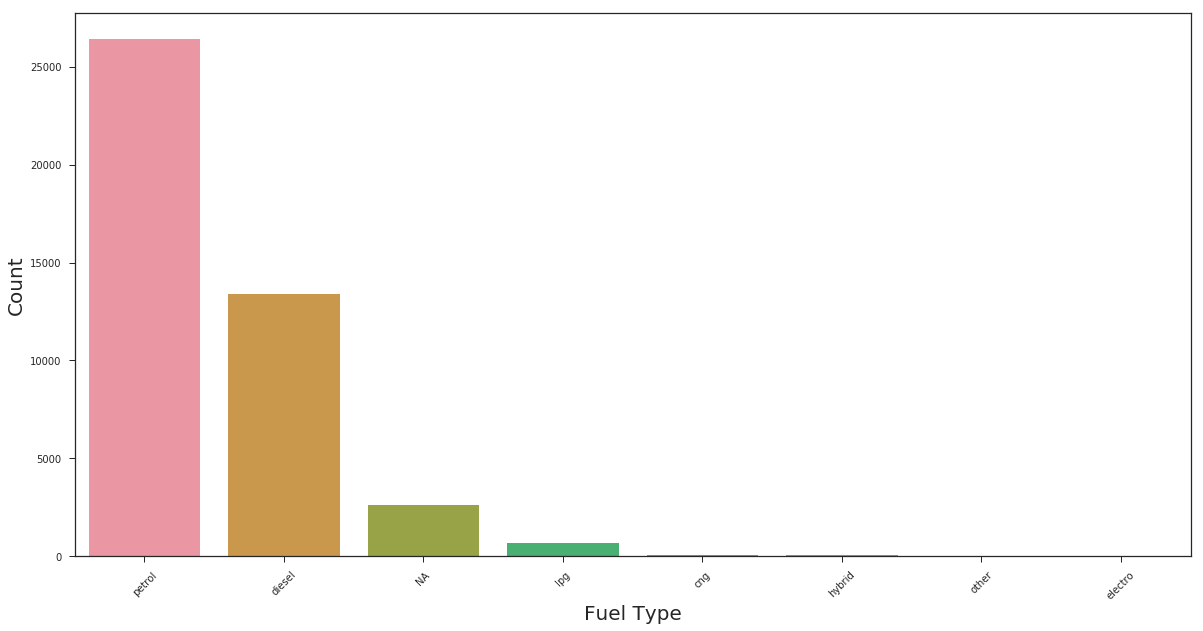

In [13]:
X5=df['fuelType'].value_counts()
plt.figure(figsize=(20,10))
plot=sns.barplot(x=X5.index,y=X5.values)
plot.set_xlabel("Fuel Type",fontsize=20)
plot.set_ylabel("Count",fontsize=20)
for item in plot.get_xticklabels():
    item.set_rotation(45)

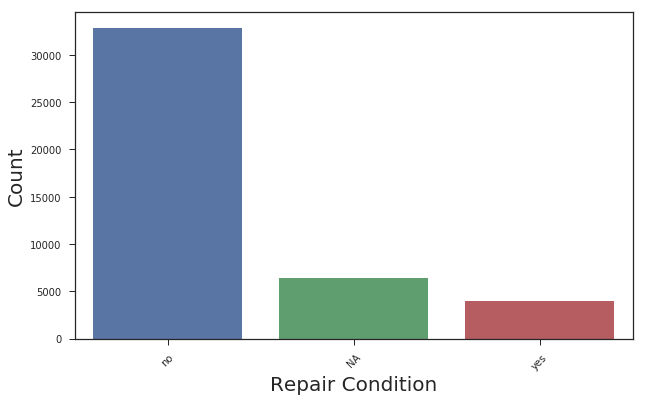

In [14]:
X6=df['notRepairedDamage'].value_counts()
plt.figure(figsize=(10,6))
plot=sns.barplot(x=X6.index,y=X6.values)
plot.set_xlabel("Repair Condition",fontsize=20)
plot.set_ylabel("Count",fontsize=20)
for item in plot.get_xticklabels():
    item.set_rotation(45)

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


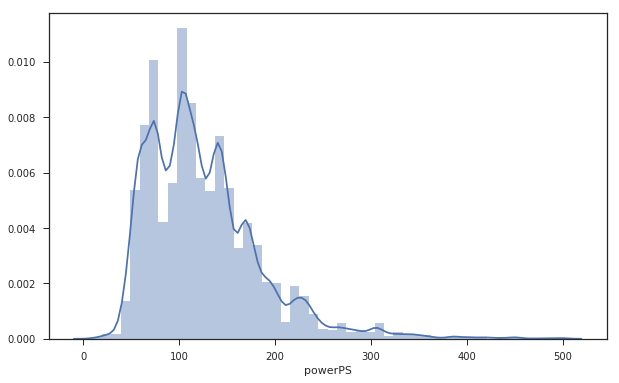

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df.powerPS)

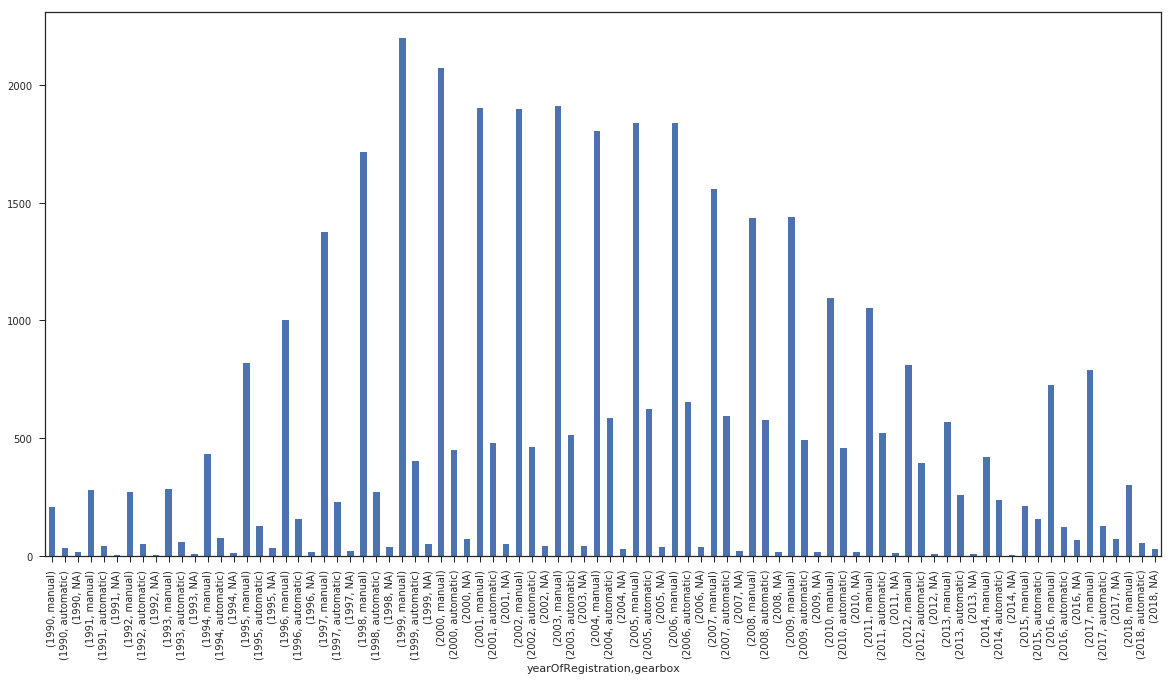

In [16]:
df1 = df[
        (df.yearOfRegistration <= 2019) 
      & (df.yearOfRegistration >= 1990)]
group = df1.groupby('yearOfRegistration')
temp_df = group.gearbox.value_counts()
plt.figure(figsize=(20,10))
plt.plot()
temp_df.plot(kind='bar')
plt.show()

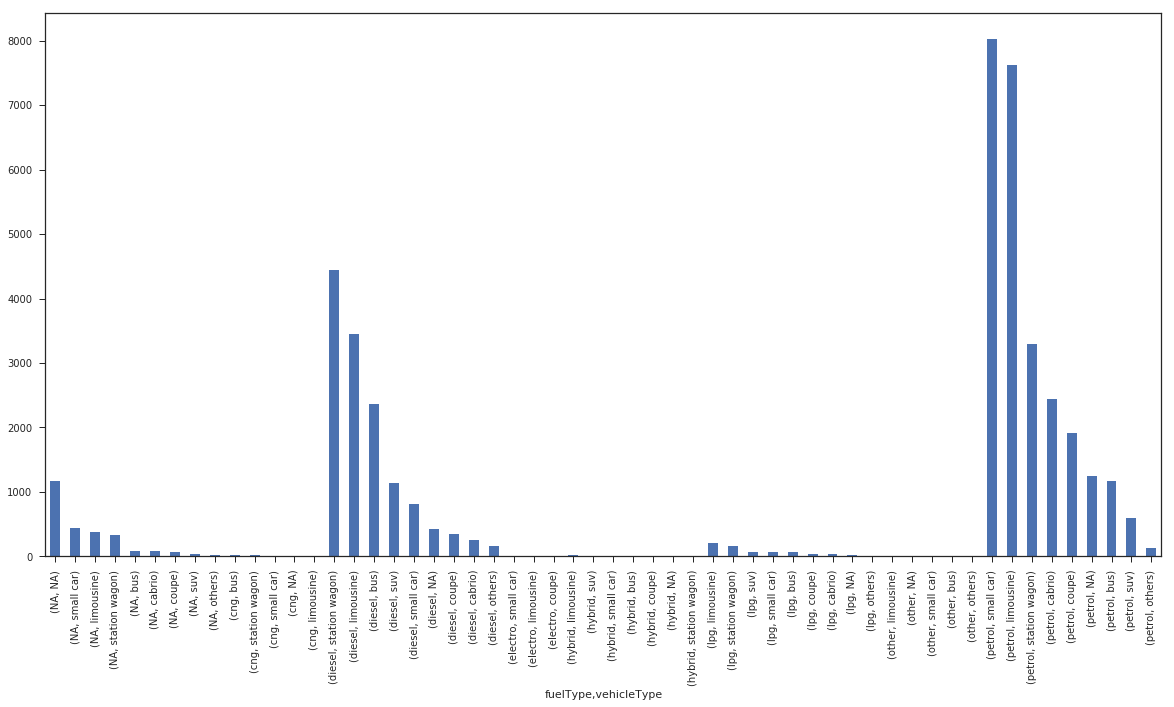

In [17]:
temp=df.groupby("fuelType")["vehicleType"].value_counts()
plt.figure(figsize=(20,10))
temp.plot(kind='bar')

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
data = df.copy()

In [20]:
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

In [21]:
from sklearn.preprocessing import StandardScaler
from tpot import TPOTRegressor
scaler = StandardScaler()
data_values = scaler.fit_transform(data.values)
data_=pd.DataFrame(data_values,index=data.index, columns=data.columns)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
# lets seperate the output and input
y  = data_["price"]
x =  data_.drop("price",axis=1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [24]:
# classifier
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.7532890342553441

In [ ]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))

[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: reg:linear
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: reg:logistic
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: binary:logistic
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: binary:logitraw
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: count:poisson
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: survival:cox
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: reg:gamma
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: reg:tweedie
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: rank:pairwise
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: rank:ndcg
[19:15:13] /workspace/src/objective/objective.cc:21: Objective candidate: rank:map
[19:15:13] /workspace/src/objective/objective.cc

HBox(children=(IntProgress(value=0, description=u'Optimization Progress', max=120, style=ProgressStyle(description_width=u'initial')), HTML(value=u'')))

[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: reg:linear
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: reg:logistic
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: binary:logistic
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: binary:logitraw
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: count:poisson
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: survival:cox
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: reg:gamma
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: reg:tweedie
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: rank:pairwise
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: rank:ndcg
[19:20:23] /workspace/src/objective/objective.cc:21: Objective candidate: rank:map
[19:20:23] /workspace/src/objective/objective.cc

In [26]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
price,1.000000,0.006944,-0.028916,0.290437,-0.200006,0.512137,0.006611,-0.392011,0.038303,-0.124232,-0.090748,0.010903
abtest,0.006944,1.000000,0.003049,-0.001519,-0.001784,0.000147,-0.002969,-0.003286,-0.000089,-0.000317,-0.000178,0.006249
vehicleType,-0.028916,0.003049,1.000000,-0.145840,0.010544,-0.036460,-0.033581,0.000650,0.050257,0.047784,-0.026921,0.073527
yearOfRegistration,0.290437,-0.001519,-0.145840,1.000000,-0.074072,0.165021,0.012177,-0.307985,0.034183,-0.259660,-0.041725,-0.015296
gearbox,-0.200006,-0.001784,0.010544,-0.074072,1.000000,-0.372043,0.031958,0.034209,-0.010902,0.135111,0.092125,0.030209
powerPS,0.512137,0.000147,-0.036460,0.165021,-0.372043,1.000000,-0.106143,-0.023887,0.045911,-0.128615,-0.316254,0.030566
model,0.006611,-0.002969,-0.033581,0.012177,0.031958,-0.106143,1.000000,-0.048375,0.006868,-0.028192,0.429815,0.020782
kilometer,-0.392011,-0.003286,0.000650,-0.307985,0.034209,-0.023887,-0.048375,1.000000,-0.025993,-0.112311,-0.021769,-0.010385
monthOfRegistration,0.038303,-0.000089,0.050257,0.034183,-0.010902,0.045911,0.006868,-0.025993,1.000000,-0.007160,-0.017981,0.047467
fuelType,-0.124232,-0.000317,0.047784,-0.259660,0.135111,-0.128615,-0.028192,-0.112311,-0.007160,1.000000,0.019987,0.036065


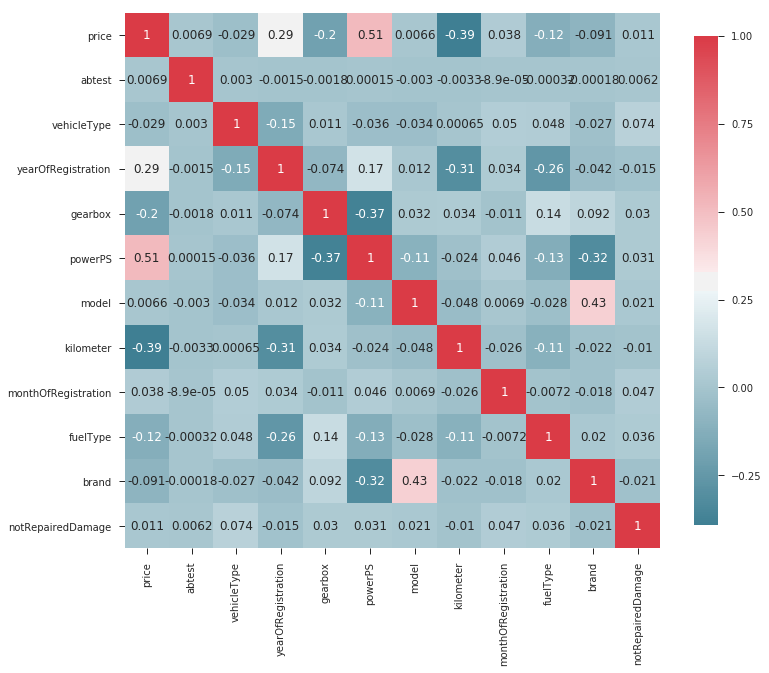

In [27]:
plot_correlation_map(data_)
data_.corr()

In [28]:
data.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                0.512137
kilometer              0.392011
yearOfRegistration     0.290437
gearbox                0.200006
fuelType               0.124232
brand                  0.090748
monthOfRegistration    0.038303
vehicleType            0.028916
notRepairedDamage      0.010903
abtest                 0.006944
model                  0.006611
Name: price, dtype: float64

In [29]:
data_.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                0.512137
kilometer              0.392011
yearOfRegistration     0.290437
gearbox                0.200006
fuelType               0.124232
brand                  0.090748
monthOfRegistration    0.038303
vehicleType            0.028916
notRepairedDamage      0.010903
abtest                 0.006944
model                  0.006611
Name: price, dtype: float64